# K-Means Clustering Algorithm on Iris Dataset

In this program we will take the Iris dataset and run a K-means clustering algorithm on it
to divide the dataset in 3 distinct clusters. Subsequently, we are going to evaluate how this
cluster solution compares to the actual clusters within the data.  

In [635]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from random import uniform
from copy import deepcopy

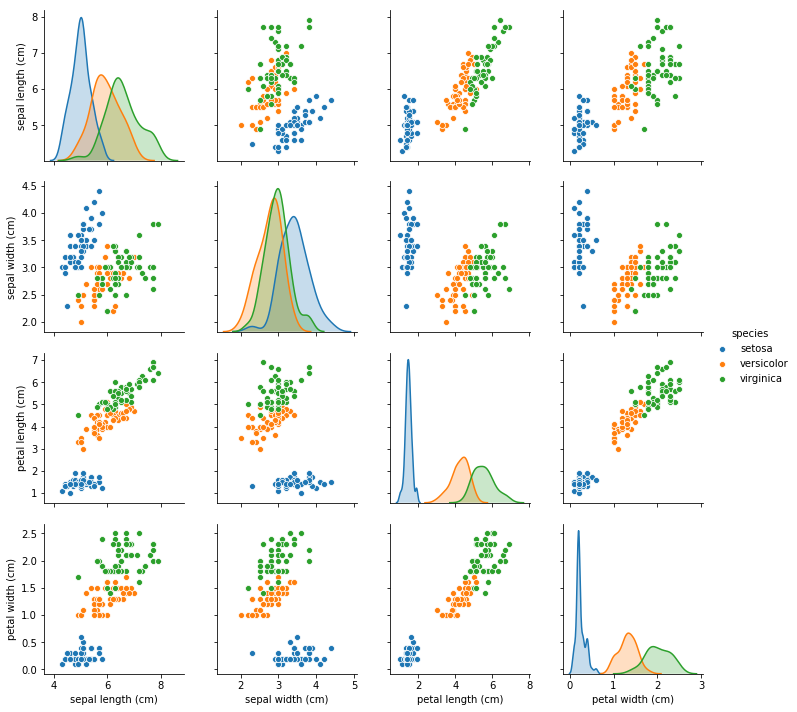

In [636]:
# ========== Part 2: loading the iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

#adding the target variable to the dataframe
data['species'] = iris['target']
#mapping to the actual names
data['species'] = data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})

# seaborn pairplot of the original dataset with datapoints colored based on class label 
sns.pairplot(data,hue="species");

In [637]:
# ========== Part 3: generate a set of initial centroids that we will use as starting point for our K-means algorithm
# defining our x-variable
x = data.iloc[:,:4].values
n_features = x.shape[1]
unique_target_labels = set(data['species'])
number_of_clusters = len(unique_target_labels)

class GenerateClusters(object):
    def GenerateRandomClusters(self,n_features,k):
        c_position = []
        for i in range(n_features):
            c_position.append(np.random.uniform(np.min(x[:,i]),np.max(x[:,i]),size=k))
            
        return c_position

c_positions = GenerateClusters().GenerateRandomClusters(n_features,number_of_clusters)
c_positions = np.array(c_positions).T
print(c_positions)


[[4.73510319 3.61726322 1.02863311 0.69260177]
 [6.6242734  2.84273239 6.85404483 0.51014051]
 [7.20724136 4.32945155 2.73484701 2.32689654]]


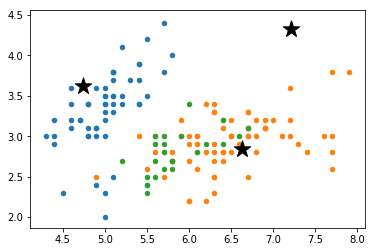

In [638]:
# ========== Part 4: Plotting the initial centroids and cluster assignments (we plot the data as scatterplot of the
# first 2 features, but initial centroids and cluster assignments are based on all 4 features!)

# define distance function using Eucledian Distance
def dist(a,b):
    return np.linalg.norm(a-b)


def Plot_initial_centroids(x,c_positions,number_of_clusters):
    clusters = np.zeros(len(x))
    for i in range(len(x)):
        distances = [dist(x[i],c) for c in c_positions]
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    for j in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if clusters[n] == j])
        plt.scatter(col_points[:,0],col_points[:,1],s=20)
    plt.scatter(c_positions[:,0],c_positions[:,1],marker='*',s=300,c='black')
    plt.show()
    
Plot_initial_centroids(x,c_positions,number_of_clusters)

In [639]:
# ========== Part 5: K-means Clustering Algorithm

def dist(a,b):
    return np.linalg.norm(a-b)

class KMeans(object):
    def KMeans_clustering(self,x,c_positions,number_of_clusters):
        clusters = np.zeros(len(x))
        previous_cluster_solution = np.zeros(c_positions.shape)
        error = 1
        
        # until the algorithm converges on a cluster solution
        while error != 0:
            for i in range(len(x)):
                # calculating distances to centroids and assigning examples to clusters
                distances = [dist(x[i],c) for c in c_positions]
                cluster = np.argmin(distances)
                clusters[i] = cluster
            
            previous_cluster_solution = deepcopy(c_positions)
            
            for j in range(number_of_clusters):
                # re-calculating centroids by averaging examples assigned to each cluster
                points = [x[n] for n in range(len(x)) if clusters[n] == j]
                c_positions[j] = np.mean(points,axis=0)
                
            # checking if the centroids have moved, compared to last iteration
            error = dist(c_positions,previous_cluster_solution)
            
        return c_positions,clusters
    
final_clusters, clust = KMeans().KMeans_clustering(x,c_positions,number_of_clusters)
print(final_clusters)
            

[[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [640]:
print(clust)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 1. 2.]


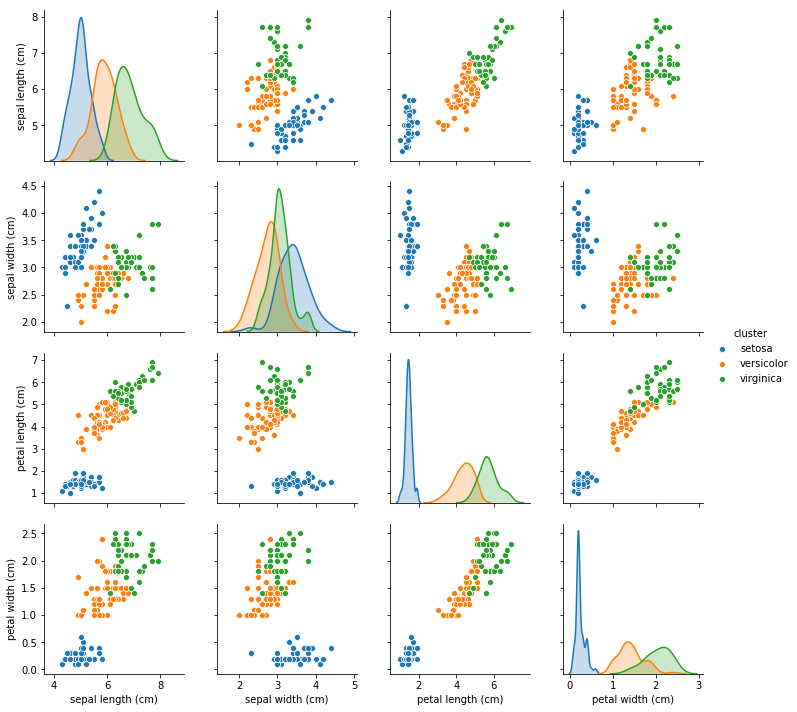

In [641]:
# ========== Part 6: Plotting the Final Cluster Solution 

data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
#adding the final clusters to the dataframe
data['cluster'] = clust
# the assignment of the cluster numbers is essentially random and depends on the
# initial centroid locations. Below we map the clusters in the same order as the original
# class labels. NOTE: this will potentially be different each time you run the script, based on
# the initially generated cluster centroids.
data['cluster'] = data['cluster'].replace({0:0,2:1,1:2})
data['cluster'] = data['cluster'].map({0:'setosa',1:'versicolor',2:'virginica'})

# seaborn pairplot of the original dataset, datapoints are now colored based on the final cluster
# solution from the K-Means Clustering Algorithm
sns.pairplot(data,hue="cluster", hue_order = ['setosa','versicolor','virginica']);


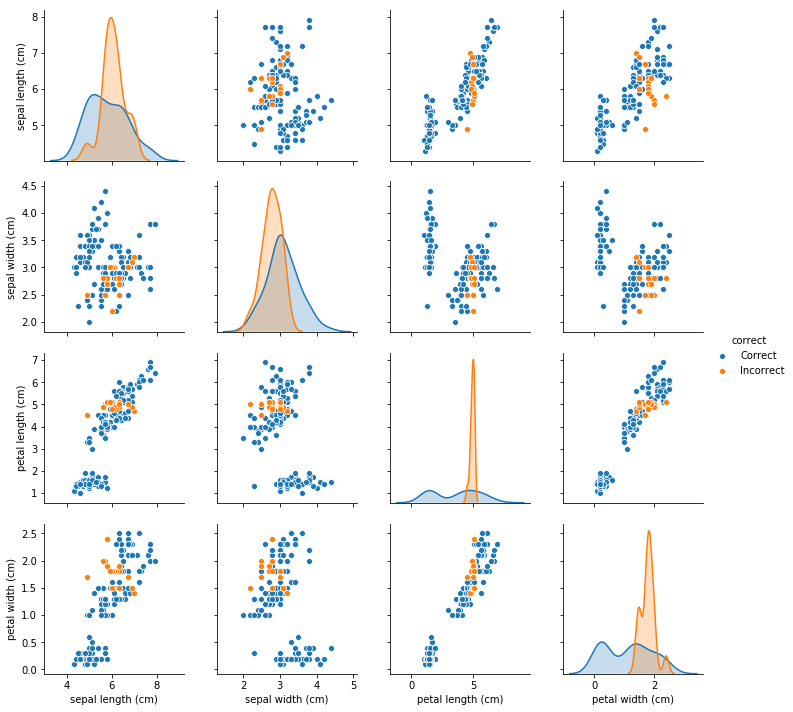

In [642]:
# ========== Part 7: Plotting all datapoints as a function of whether the final cluster solution is similar to the
# actual class label or not
data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
data['species'] = iris['target']
data['cluster'] = clust
# Same thing here, so we can compare the results with the actual class labels
data['cluster'] = data['cluster'].replace({0:0,2:1,1:2})

correctness = data['cluster'] == data['species']

df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df['correct'] = correctness
df['correct'] = df['correct'].replace({True:'Correct',False:'Incorrect'})

sns.pairplot(df,hue="correct");

In [643]:
# ========== Part 8: calculating the similarity between the actual labels of the data and the clusters found with 
# K-Means Clustering Algorithm

print('Percentage of the datapoints that overlap between the class labels \n')
print('and unsupervised K-means cluster assignment is: \n')

similarity = correctness.mean()
print("{:.2f}".format(similarity*100) + str("%"))

Percentage of the datapoints that overlap between the class labels 

and unsupervised K-means cluster assignment is: 

88.67%
